In [6]:
import os
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [7]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

# Explorative data analysis

In [8]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,Unnamed: 0,date,US,Spain,Germany,"Korea, South",Italy
233,233,2020-09-11,6443743,566326,259735,22055,284796
232,232,2020-09-10,6396100,554143,258149,21919,283180
231,231,2020-09-09,6360212,543379,256433,21743,281583
230,230,2020-09-08,6327009,534513,254957,21588,280153
229,229,2020-09-07,6300622,525549,253626,21432,278784


# Matplotlib example

<Figure size 1152x648 with 0 Axes>

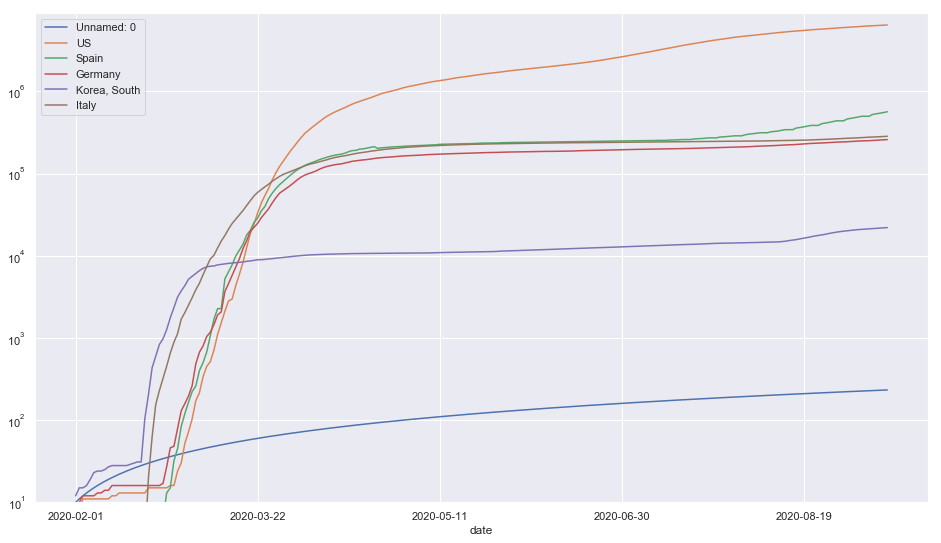

In [9]:
plt.figure();
ax=df_plot.iloc[10:,:].set_index('date').plot()
plt.ylim(10, 9000000)
ax.set_yscale('log')

# Plot.ly for interactive plots

In [10]:
import plotly.graph_objects as go
import plotly
plotly.__version__


'4.8.2'

In [11]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ]

In [12]:
fig=go.Figure()

In [13]:
df_plot
import webbrowser    
urL='https://www.google.com'
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
webbrowser.register('chrome', None,webbrowser.BackgroundBrowser(chrome_path))
webbrowser.get('chrome').open_new_tab(urL) 

True

In [14]:
#defines how to plot individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                        y=df_plot[each],
                        mode='markers+lines',
                            name=each,
                            opacity=0.9,
                             marker_size=4,
                             line_width=2
                    ))
#defines overall layout properties
fig.update_layout(

width= 1000,
height=800,
xaxis_title='Time',
yaxis_title='confirmed infected people(source John Hopkins, log scale)')
fig.update_yaxes(type="log", range = [1.1,5.5])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='chrome')

import dash
import dash_core_components as dcc
import dash_html_components as html

app=dash.Dash()
app.layout= html.Div([
    dcc.Graph(figure=fig, id='main_window_slope')
])

app.run_server(debug=True, use_reloader=False) #Turn off reloader if inside Jupyter

In [15]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [16]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [17]:
# take care to press stop button befor calling once again, since address will be blocked (server up)
# if you have problems to find (kill) the process, use the following cmd commands (Linux)
# sudo lsof -n -i :8050 | grep LISTEN 
# kill -9 pid 

app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 692-502-195
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# Population data 

In [27]:
#downladed from 'https://www.kaggle.com/tanuprabhu/population-by-country-2020'

In [28]:
population_data_path='../data/raw/population_by_country_2020.csv'

In [29]:
population_data_1= pd.read_csv (population_data_path)
population_data_1.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [30]:
population_data_1.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [31]:
my_cols= ('Country (or dependency)', 'Population (2020)')

In [32]:
population_data=population_data_1[['Country (or dependency)', 'Population (2020)']]
population_data.tail()

,Country (or dependency),Population (2020)
230,Montserrat,4993
231,Falkland Islands,3497
232,Niue,1628
233,Tokelau,1360
234,Holy See,801


In [33]:
population_data.set_index('Country (or dependency)')

,Population (2020)
Country (or dependency),
China,1440297825
India,1382345085
United States,331341050
Indonesia,274021604
Pakistan,221612785
Brazil,212821986
Nigeria,206984347
Bangladesh,164972348
Russia,145945524


In [34]:
population_data.rename(columns={"Country (or dependency)": "country"})

,country,Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
5,Brazil,212821986
6,Nigeria,206984347
7,Bangladesh,164972348
8,Russia,145945524
9,Mexico,129166028


# Test code

#pd_relational_model=pd.read_csv('../data/processed/COVID_relational_confirmed.csv')
pd_relational_model = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';', error_bad_lines=False)
pd_relational_model.tail()

pd_relational_model=pd_relational_model.drop(['state'], axis=1)
pd_relational_model.tail()